## imports

In [113]:
from useful_scit.imps import *

In [114]:
LT = "local time"

In [115]:

def merge_df_ds(da2, ds_cl, lev='LEV0',con='18'):
    d1 = ds_cl.loc[{'normalized': 0}]
    d1 = d1['conc_lab_nc'+con].loc[{'z_column': lev}].reset_coords(
        drop=True).to_dataset('lab_nc'+con)
    dd1 = d1.to_dataframe()
    dm = pd.merge(dd1, da2, left_index=True, right_index=True)
    
    # add night flag
    dm['night']=dm.index.hour.isin([19,20,21,22,23,24,0,1,2,3,4,5,6,7,8]).astype(int)
    return dm

def open_ds(cluster_path):
    ds_cl = xr.open_dataset(cluster_path)
    ds_cl[LT] = ds_cl['releases'] - pd.Timedelta(hours=3.5)
    ds_cl = ds_cl.swap_dims({'releases': LT})
    return ds_cl


def open_df(c45_path):
    df_45 = pd.read_excel(c45_path)

    df_45[LT] = pd.to_datetime(df_45['Time_LT'], format='%d/%m/%Y %H:%M:%S')

    da1 = df_45.set_index(LT).drop('Time_LT', axis=1)

    da2 = da1.resample('h').mean()
    da2.index += pd.Timedelta(hours=.5)
    return da2

### open dataset

In [116]:
cluster_path = '/Users/diego/flexpart_management/flexpart_management/releases/v03/data/cluster_series_v3.nc'
c45_path = '/Users/diego/flexpart_management/flexpart_management/notebooks/george_paper/c45_timeseries.xlsx'

In [117]:
da2 = open_df(c45_path)
ds_cl = open_ds(cluster_path)
dm = merge_df_ds(da2, ds_cl)
d = ds_cl.loc[{'normalized': 0}]

### plot histogram

In [7]:
ds_cl['conc_lab_nc18'].loc[{'normalized':0}]

<xarray.DataArray 'conc_lab_nc18' (lab_nc18: 18, z_column: 3, local time: 4248)>
[229392 values with dtype=float64]
Coordinates:
    normalized  int64 0
  * z_column    (z_column) object 'ALL' 'BL' 'LEV0'
    releases    (local time) datetime64[ns] 2017-12-06 ... 2018-05-31T23:00:00
  * lab_nc18    (lab_nc18) object '08_LR' '12_SR' '10_SR' ... '08_SM' '02_SR'
  * local time  (local time) datetime64[ns] 2017-12-05T20:30:00 ... 2018-05-3...
Attributes:
    short name:    SRR
    long name:     SRR
    type:          variable
    descritption:  SRR either normalized or not.

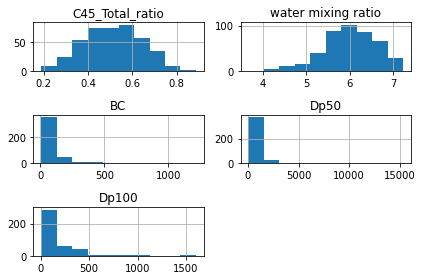

In [8]:
da2.hist();
plt.gcf().tight_layout()

### plot correlations

In [9]:
dm

,08_LR,12_SR,10_SR,04_SR,03_SM,12_SM,07_SR,07_LR,05_MR,02_MR,...,11_SR,11_MR,08_SM,02_SR,C45_Total_ratio,water mixing ratio,BC,Dp50,Dp100,night
local time,,,,,,,,,,,,,,,,,,,,,
2018-01-06 12:30:00,0.0,5392.269812,2087.127648,317.117837,639.337053,3323.688614,656.026044,0.0,19.392052,2.670484,...,4310.479532,1296.714752,5573.033825,6460.484034,0.595792,5.682307,169.606481,813.190620,819.476550,0
2018-01-06 13:30:00,0.0,3808.382317,1764.570808,282.141025,830.312777,3999.183059,571.022938,0.0,13.600504,6.032302,...,3746.096016,1688.019505,4654.556249,6412.844187,0.592043,6.092728,178.444444,779.673750,848.450885,0
2018-01-06 14:30:00,0.0,2939.678351,1772.415495,212.413228,1224.018469,6603.072859,343.272839,0.0,14.436097,4.474857,...,4238.671943,2892.471034,3420.630831,10072.047928,0.570191,5.894021,171.402778,805.735685,868.566670,0
2018-01-06 15:30:00,0.0,2177.656559,1780.657190,493.024374,1162.229984,4824.218489,895.064640,0.0,13.327546,6.733416,...,3425.183966,2064.816588,3941.462018,7849.280547,0.617715,6.256450,190.212963,645.950095,836.028690,0
2018-01-06 16:30:00,0.0,2339.825618,2094.342131,457.183339,1302.252833,5527.404200,1016.887630,0.0,18.465128,4.424581,...,4464.130556,2584.444035,3761.231436,8030.267440,0.560870,6.913516,170.255952,496.657235,729.438895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-25 19:30:00,0.0,1557.140895,614.862641,1171.282371,2457.103228,3736.159864,130.657271,0.0,262.687255,205.995879,...,2067.546297,2640.609914,75.884062,5823.539390,0.326132,6.653780,765.833333,4582.944550,657.615875,1
2018-01-25 20:30:00,0.0,2121.789963,236.792851,792.236245,3127.084017,4570.698001,60.910079,0.0,395.721622,344.130193,...,1470.498781,2811.245000,48.026104,4183.193027,0.187774,6.608329,586.444444,NaN,NaN,1
2018-01-25 21:30:00,0.0,2283.214602,196.872505,456.253488,2359.337372,5465.526637,40.995556,0.0,228.648223,381.655039,...,1247.606932,2626.528911,28.538458,1729.080055,0.199132,6.293384,393.150794,NaN,NaN,1


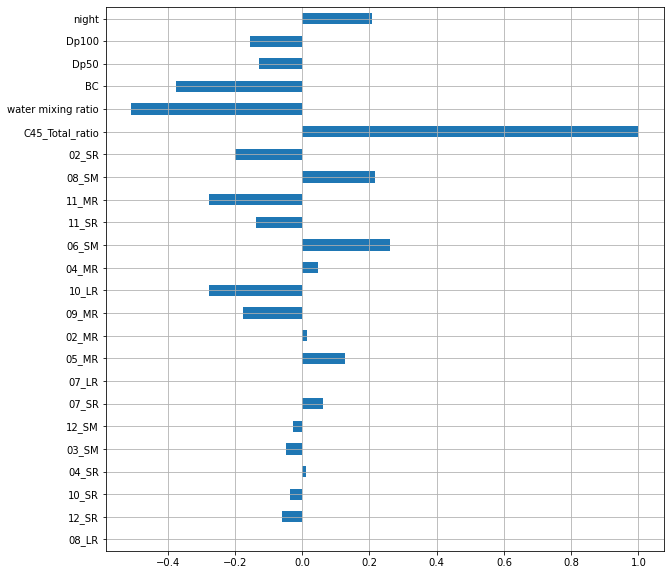

In [10]:
_ = dm.corr(method='spearman')['C45_Total_ratio']
_.plot.barh(figsize=(10, 10))
plt.gca().grid()

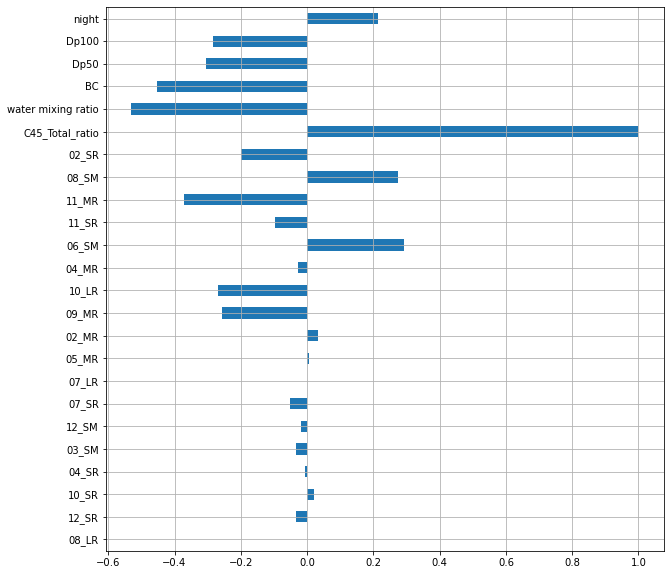

In [11]:
_ = dm.corr(method='pearson')['C45_Total_ratio']
_.plot.barh(figsize=(10, 10))
plt.gca().grid()

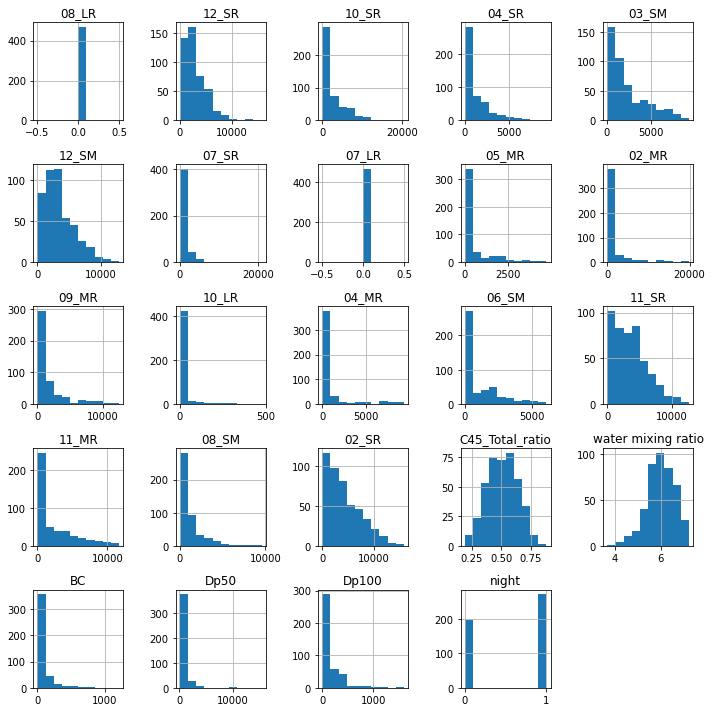

In [12]:
dm.hist(figsize=(10, 10))
plt.gcf().tight_layout()

### sklearn

In [13]:
import sklearn.preprocessing

In [14]:
qt = sklearn.preprocessing.RobustScaler(quantile_range=(10.0, 90.0))

In [15]:
dm1 = dm.dropna().copy()
dmm = dm1.copy()
dm1 = dm1 * 0 + qt.fit_transform(dm1)

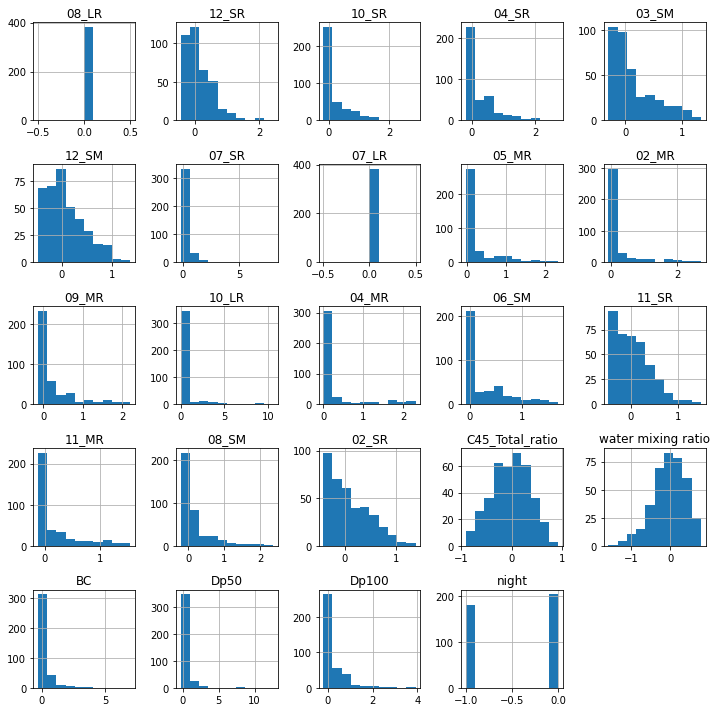

In [16]:
dm1.hist(figsize=(10, 10))
plt.gcf().tight_layout()

In [17]:
import sklearn.cluster

In [18]:
nc = 8
km = sklearn.cluster.KMeans(n_clusters=nc)

In [19]:
dm2 = dm1.copy()
dm2['C45_Total_ratio'] *= 5
dm2['night'] *= 5
km.fit(dm2)
dm2['C45_Total_ratio'] /= 5
dm2['night'] /= 5

In [20]:
valas = pd.DataFrame(km.cluster_centers_, columns=dm2.columns).sort_values(
    ['C45_Total_ratio']).index

In [21]:
kk = {k: a for k, a in zip(valas, 'abcdefghijklmnopqrstuv')};

In [22]:
dmm['k'] = [kk[x] for x in km.labels_]

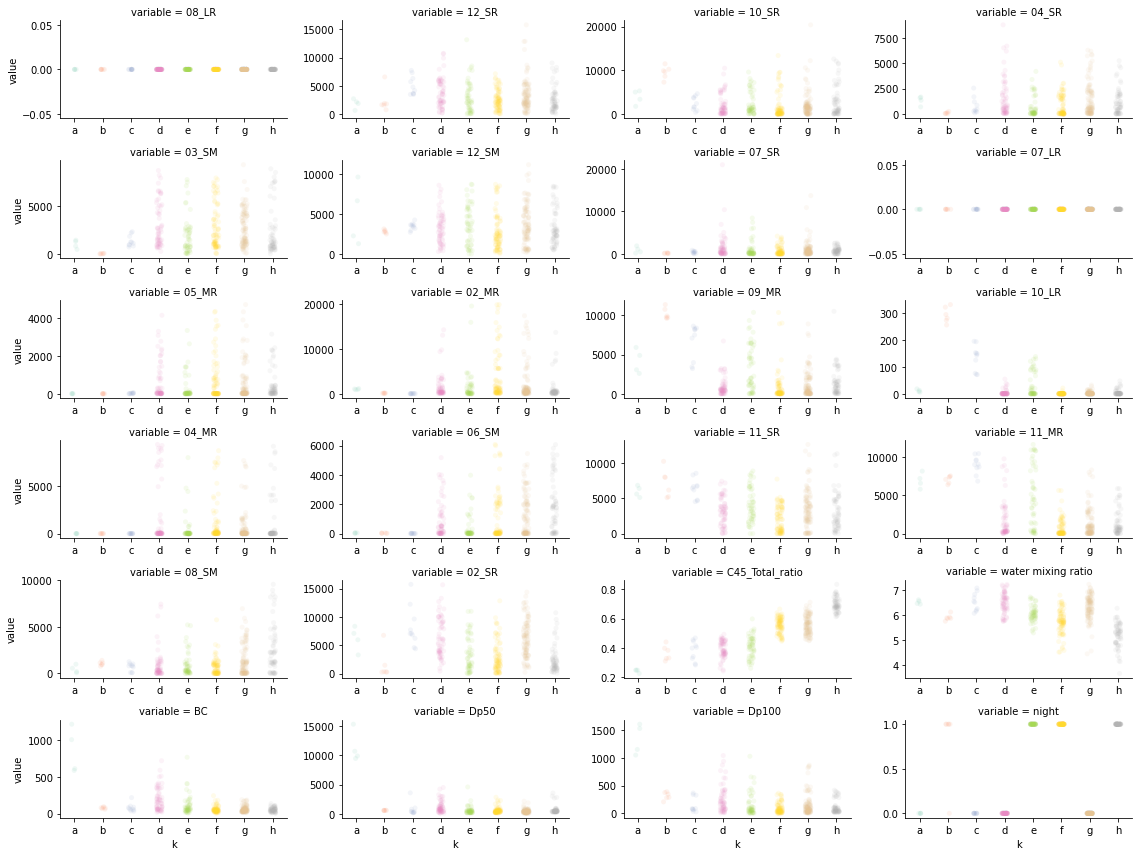

In [23]:
g = sns.catplot(x='k', y='value', data=dmm.melt(id_vars='k'), orient="v",
                kind="strip",
                col='variable', col_wrap=4, sharex=False, palette='Set2',
                sharey=False, aspect=2, height=2,
                order='abcdefghijklmnopqrstuv'[:nc],
                alpha=.1,
                #                size=1

                )

# g.set_xticklabels(rotation=90)
# plt.gcf().set_dpi(50)
plt.gcf().tight_layout()

### Compare time series

In [24]:
dmm.iloc[:,:18]/dmm.iloc[:,:18].mean()

,08_LR,12_SR,10_SR,04_SR,03_SM,12_SM,07_SR,07_LR,05_MR,02_MR,09_MR,10_LR,04_MR,06_SM,11_SR,11_MR,08_SM,02_SR
local time,,,,,,,,,,,,,,,,,,
2018-01-06 12:30:00,NaN,1.719893,0.882697,0.267998,0.249235,0.993088,0.639507,NaN,0.034931,0.001249,2.723351,0.179752,0.000000e+00,1.705804,1.310628,0.612625,4.301200,1.437362
2018-01-06 13:30:00,NaN,1.214704,0.746280,0.238439,0.323683,1.194920,0.556644,NaN,0.024499,0.002822,2.358149,0.375657,2.540261e-07,1.354126,1.139024,0.797495,3.592330,1.426763
2018-01-06 14:30:00,NaN,0.937626,0.749598,0.179512,0.477162,1.972938,0.334629,NaN,0.026004,0.002094,2.213400,0.611901,0.000000e+00,1.021922,1.288794,1.366531,2.640001,2.240882
2018-01-06 15:30:00,NaN,0.694575,0.753084,0.416658,0.453075,1.441433,0.872526,NaN,0.024007,0.003150,2.136527,0.440436,0.000000e+00,1.079401,1.041448,0.975511,3.041973,1.746349
2018-01-06 16:30:00,NaN,0.746300,0.885749,0.386369,0.507661,1.651538,0.991282,NaN,0.033262,0.002070,2.257596,0.467144,0.000000e+00,0.858620,1.357346,1.221005,2.902873,1.786616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-25 16:30:00,NaN,0.608183,0.447311,1.797802,1.219892,1.121158,0.263880,NaN,0.474220,0.114890,0.175140,0.000000,3.926114e-04,0.124073,0.897791,1.517949,0.125896,2.094959
2018-01-25 17:30:00,NaN,0.520104,0.553850,1.883482,1.046014,0.969816,1.283550,NaN,0.445670,0.099969,0.132287,0.000000,3.145621e-03,0.148700,0.713037,1.314514,0.125720,1.486572
2018-01-25 18:30:00,NaN,0.281834,0.319372,1.352265,1.176379,0.945594,0.258770,NaN,0.494628,0.100580,0.115057,0.000000,2.531815e-03,0.121191,0.612299,1.292375,0.070933,1.439959


In [25]:
def plt_bp(dmm):
    ccn = pd.Series(list(dmm.columns[:18]))
    
    ccn = ccn[ccn.str.endswith('_SR')]
    
    print(ccn)

    nd = dmm[ccn].mean()
#     nd['T'] = 'mean'
    pp = []
    
   
    for c in ['e','g']:
        nd1 = dmm[dmm['k']==c][ccn]
        nd1['T'] = c
        pp.append(nd1)

    pc = pd.concat([*pp])
    
    pc[ccn] = pc[ccn]/nd
    

    # pc[ccn] = np.log(pc[ccn])

    _,ax = plt.subplots(figsize=(20,5),dpi=70)
    sns.boxplot(
        data=pc.melt(id_vars='T'),
        x='variable',
        y='value',
        hue='T'
    )
    ax.set_ylim(.01,3)
#     ax.set_yscale('log')

1     12_SR
2     10_SR
3     04_SR
6     07_SR
14    11_SR
17    02_SR
dtype: object


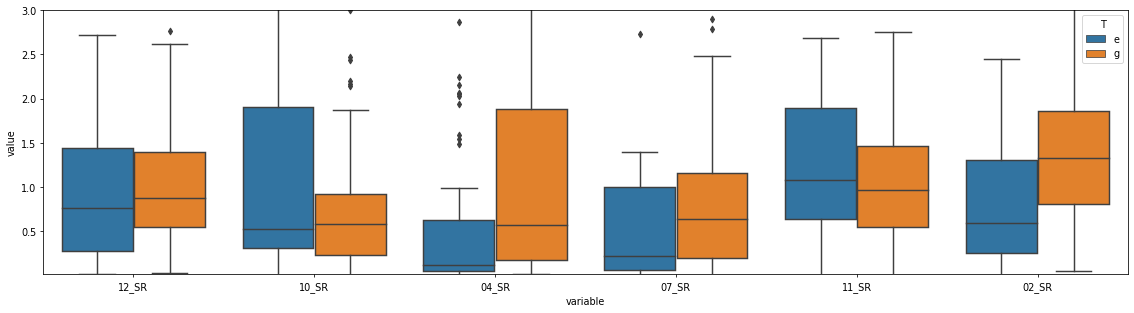

In [26]:
plt_bp(dmm)

<AxesSubplot:>

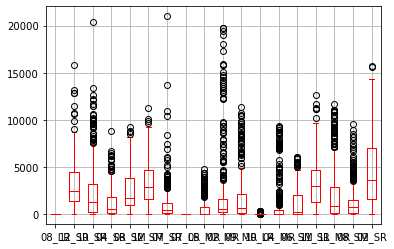

In [27]:
dmm.iloc[:,:18].boxplot(color='r')

<AxesSubplot:>

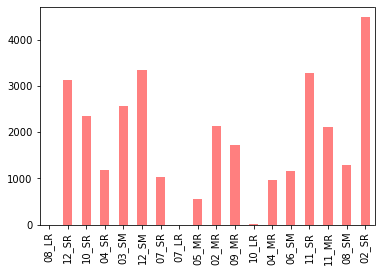

In [29]:
dmm.iloc[:,:18].mean().plot.bar(color='r',alpha=.5)
dmm[dmm['k']=='r'].iloc[:,:18].mean().plot.bar(color='b',alpha=.5)

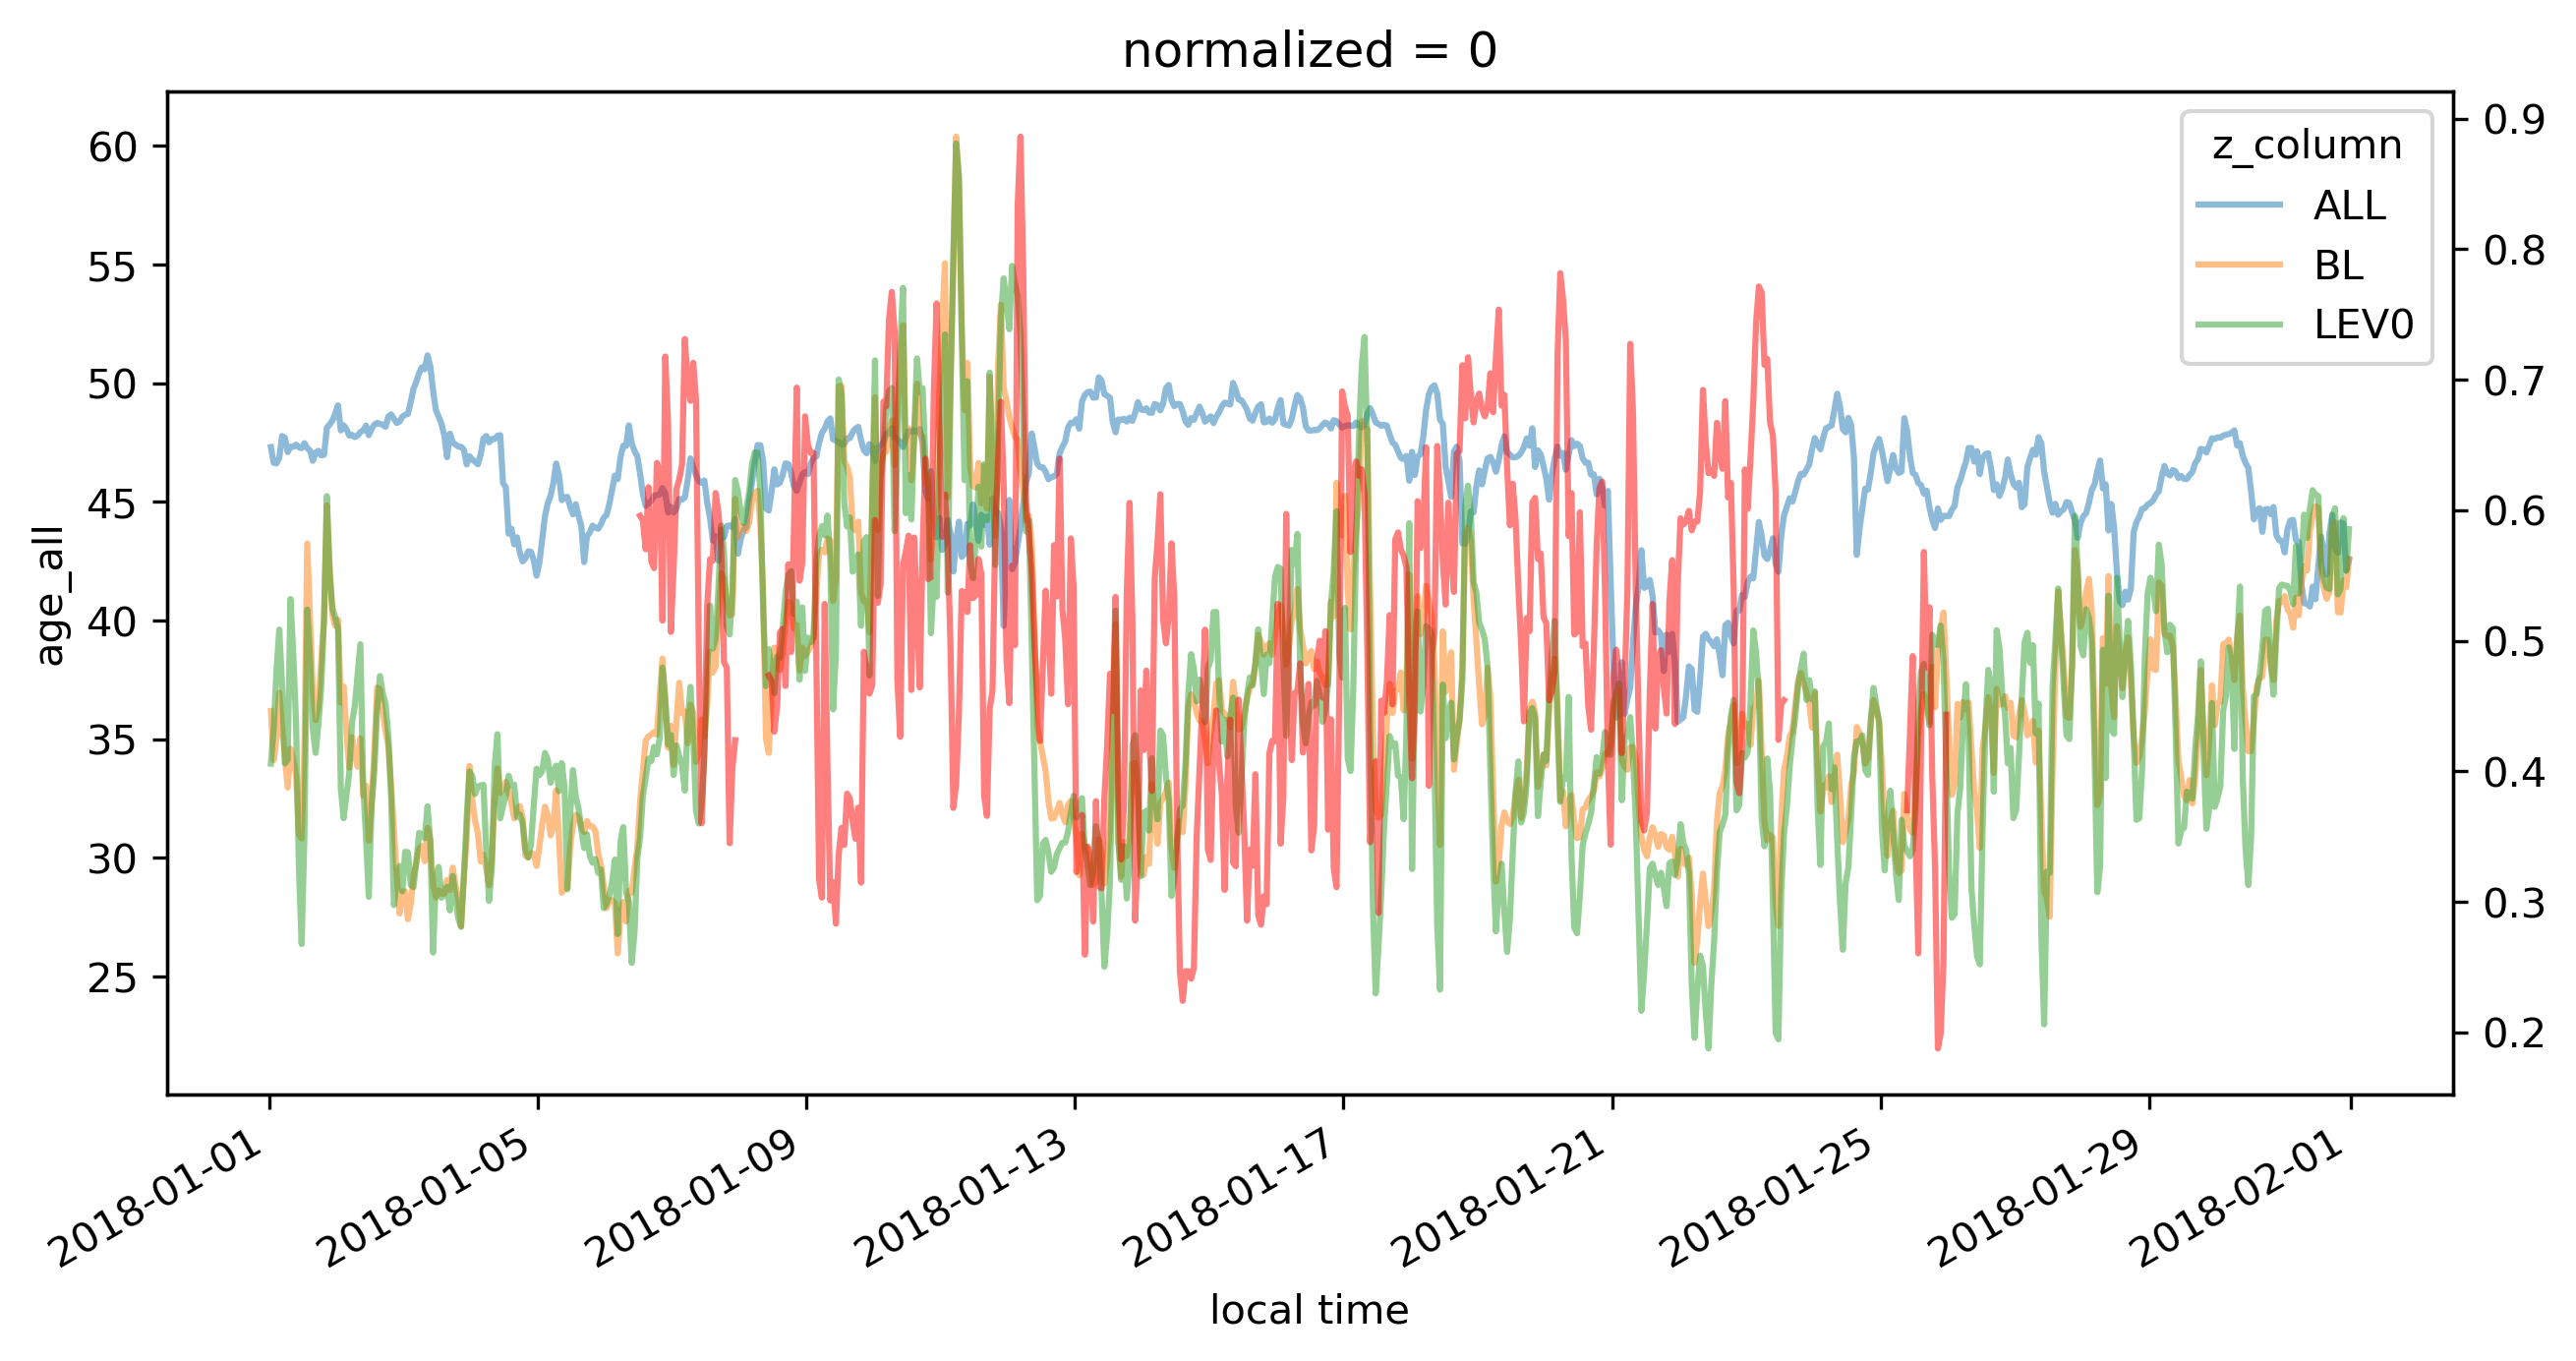

In [30]:
ds_cl.loc[{'normalized':0}].loc[{LT: '2018-01'}]['age_all'].plot(hue='z_column', figsize=(10, 5),
                                       alpha=.5)
ax = plt.gca()
axt = ax.twinx()
da2['C45_Total_ratio'].plot(ax=axt, alpha=.5, color='red')
ax.figure.set_dpi(300)

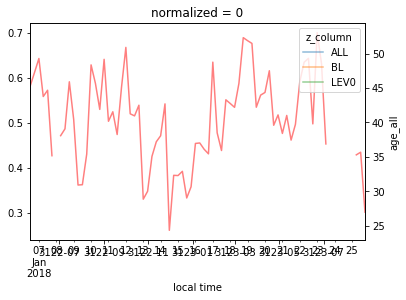

In [31]:
da2['C45_Total_ratio'].resample('6H').mean().plot(alpha=.5, color='red')
ax = plt.gca()
axt = ax.twinx()
d.loc[{LT: '2018-01'}]['age_all'].resample({LT: '6H'}).mean().plot(
    hue='z_column', alpha=.5, ax=axt)
# ax.figure.set_dpi(300)

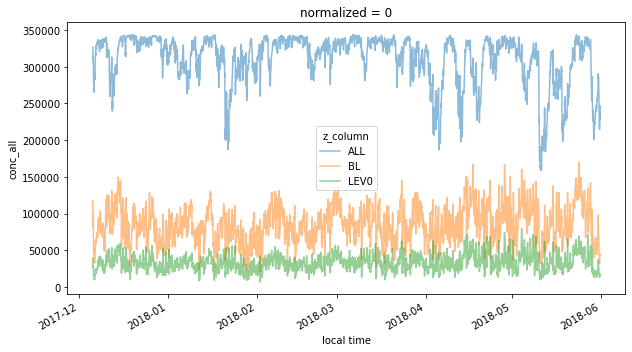

In [32]:
ds_cl['conc_all'].loc[{'normalized': 0}].plot(hue='z_column',
                                              figsize=(10, 5), alpha=.5)

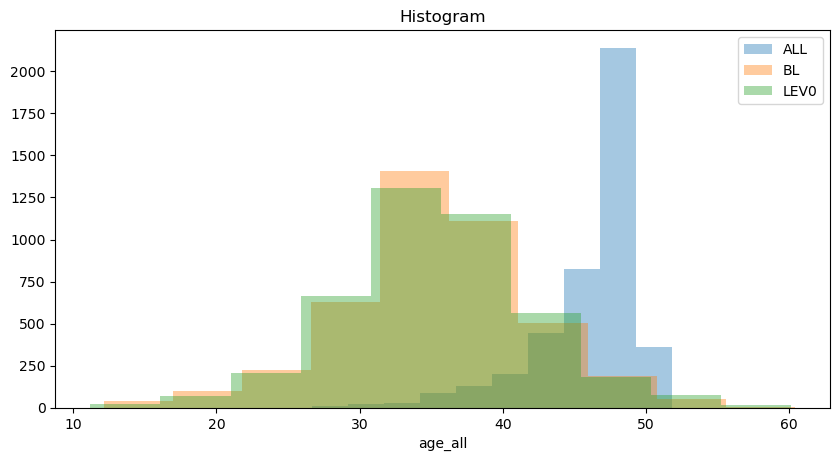

In [33]:
for c in ds_cl['z_column']:
    ds_cl['age_all'].loc[{'z_column': c}].plot.hist(alpha=.4, label=c)
plt.gca().legend()
plt.gcf().set_size_inches(10, 5)
plt.gcf().set_dpi(100)

In [34]:
plt.Figure.set_si

AttributeError: type object 'Figure' has no attribute 'set_si'

In [35]:
s = pd.Series(dm.columns)

In [36]:
sr = s[s.str.endswith('_SR')]
sm = s[s.str.endswith('_SM')]
mr = s[s.str.endswith('_MR')]
lr = s[s.str.endswith('_LR')]

In [37]:
dm['SR_'] = dm[sr].sum(axis=1)
dm['SM_'] = dm[sm].sum(axis=1)
dm['MR_'] = dm[mr].sum(axis=1)
dm['LR_'] = dm[lr].sum(axis=1)
dm['SS_'] = dm['SR_'] + dm['SM_']

<AxesSubplot:xlabel='SR_', ylabel='C45_Total_ratio'>

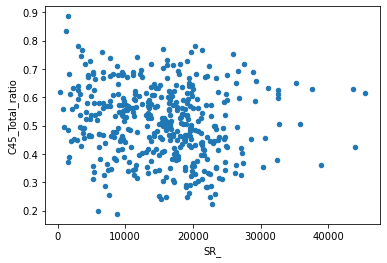

In [38]:
dm.plot.scatter(x='SR_', y='C45_Total_ratio')

<AxesSubplot:xlabel='SM_', ylabel='C45_Total_ratio'>

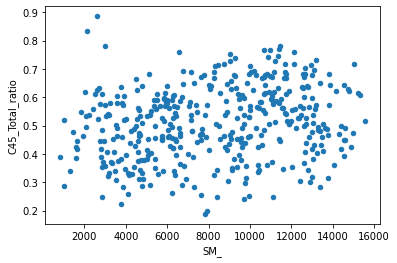

In [39]:
dm.plot.scatter(x='SM_', y='C45_Total_ratio')

<AxesSubplot:xlabel='MR_', ylabel='C45_Total_ratio'>

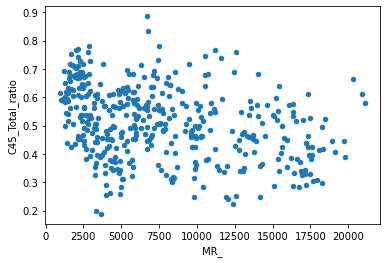

In [40]:
dm.plot.scatter(x='MR_', y='C45_Total_ratio')

<AxesSubplot:xlabel='LR_', ylabel='C45_Total_ratio'>

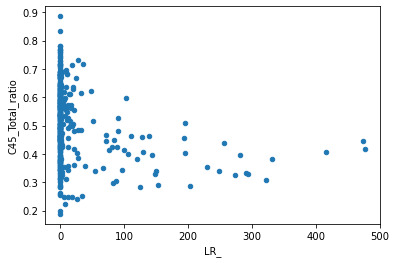

In [41]:
dm.plot.scatter(x='LR_', y='C45_Total_ratio')

<AxesSubplot:xlabel='SS_', ylabel='C45_Total_ratio'>

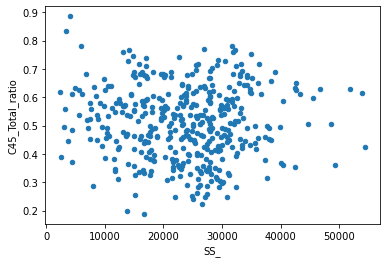

In [42]:
dm.plot.scatter(x='SS_', y='C45_Total_ratio')




## create a BL flag

In [43]:
def ppl(m=True):
    if m:
        dmA = merge_df_ds(da2, ds_cl,lev='ALL')
        dmB = merge_df_ds(da2, ds_cl,lev='BL')
        dm = dmA
        dm[dm.columns[:18]] = dmA[dm.columns[:18]]-dmB[dm.columns[:18]]
    else:
        dm = merge_df_ds(da2, ds_cl,lev='BL')

    dm = dm[dm['night']==1]
    dm = dm.resample('h').mean()
    dm.index += pd.Timedelta(hours=.5)

    sr_ = dm.columns[dm.columns.str.endswith('_SR')]
    sr_lev0 = dm[sr_].sum(axis=1)
    dm['SR'] = sr_lev0

    sr_ = dm.columns[dm.columns.str.endswith('_SM')]
    sm_lev0 = dm[sr_].sum(axis=1)
    dm['SM'] = sm_lev0

    mr_ = dm.columns[dm.columns.str.endswith('_MR')]
    mr_lev0 = dm[mr_].sum(axis=1)
    dm['MR'] = mr_lev0

    mr_ = dm.columns[dm.columns.str.endswith('_LR')]
    lr_lev0 = dm[mr_].sum(axis=1)
    dm['LR'] = lr_lev0




    ddd= dm[dm['night']==1]

#     plt.subplots(figsize=(20,20),dpi=200)
    dc = ddd.corr().sort_values('C45_Total_ratio')
    dc = dc.T.sort_values('C45_Total_ratio')
#     sns.heatmap(dc,cmap = plt.get_cmap('RdBu_r',15),center=0,vmin=-.7,vmax=.7,linewidths=1,square=True,
#                 annot=True,fmt="0.1f"
#                )
    return dm,dc

In [44]:
%matplotlib inline
ddd,dc = ppl()

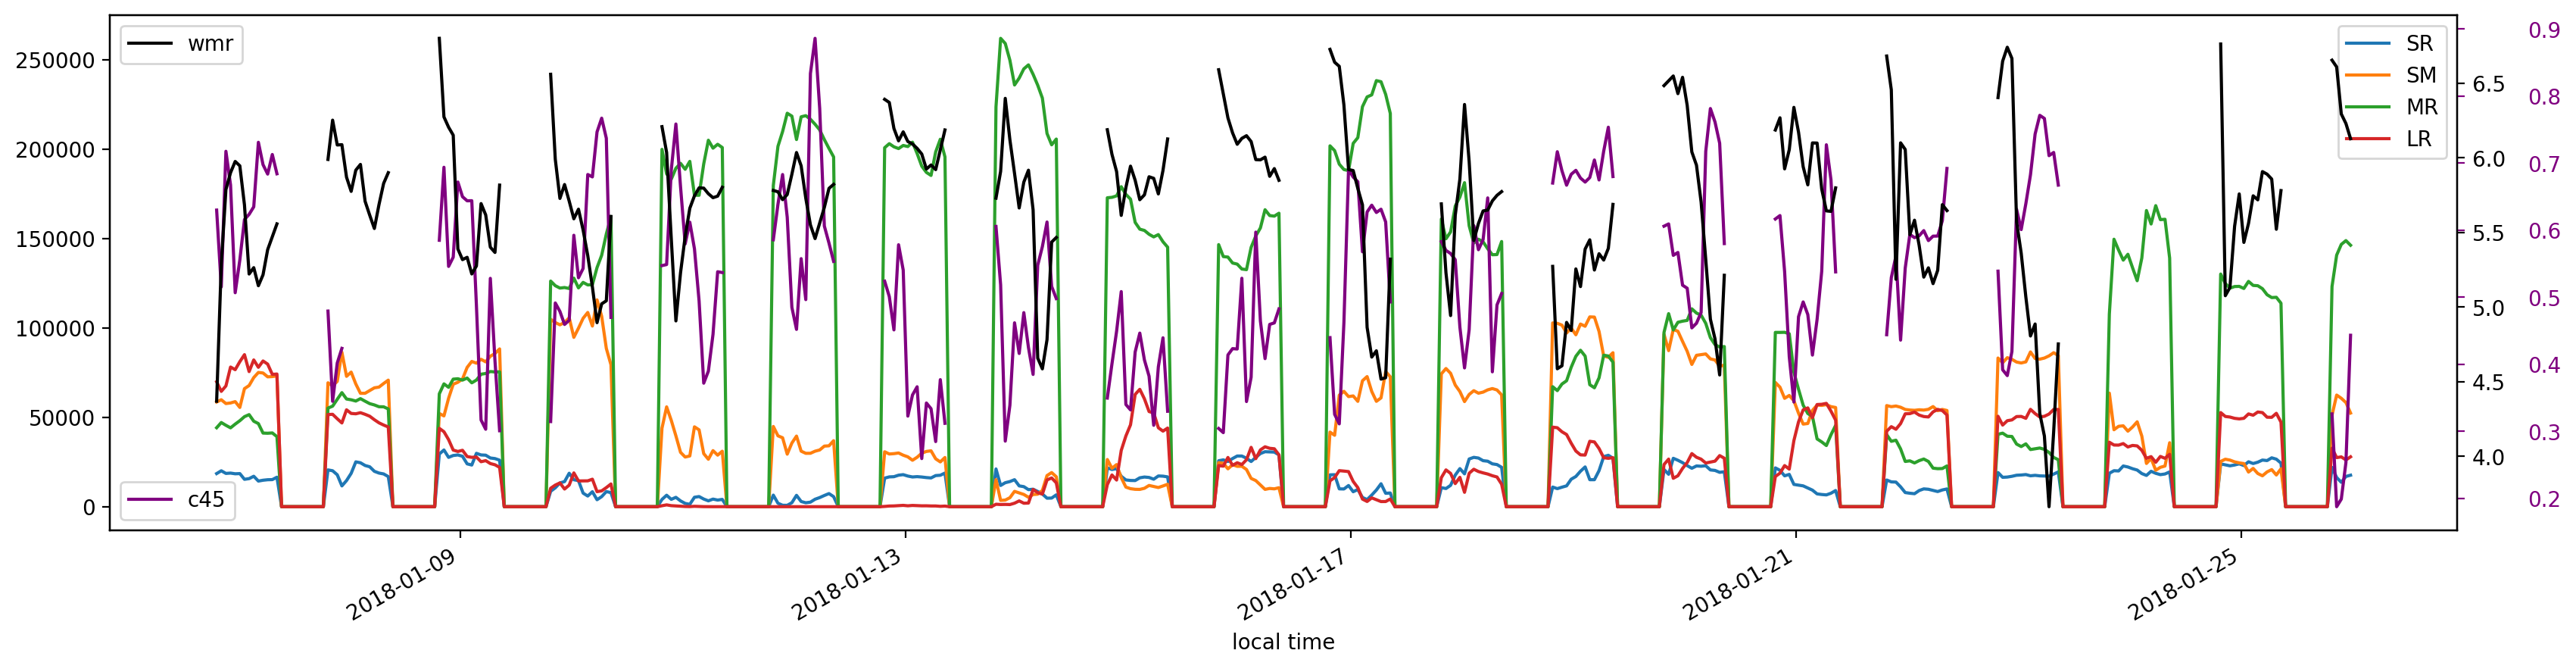

In [45]:
f,ax=plt.subplots(figsize=(20,5),dpi=200)
ddd[['SR','SM','MR','LR']].plot(ax=ax)
# ax = plt.gca()
axt = ax.twinx()
ax3 = ax.twinx()
ddd['C45_Total_ratio'].plot(ax=axt,c='purple', label='c45')
axt.tick_params(pad=30,color='purple',labelcolor='purple')
ddd['water mixing ratio'].plot(ax=ax3,c='k', label='wmr')
ax3.tick_params(color='k',labelcolor='k')
ax.legend()
axt.legend(loc='lower left')
ax3.legend()

In [46]:
dc.loc[['C45_Total_ratio','water mixing ratio','BC']]

,water mixing ratio,10_LR,BC,11_MR,MR,10_SR,11_SR,SR,Dp100,09_MR,...,12_SM,LR,08_LR,04_SR,08_SM,07_LR,06_SM,SM,C45_Total_ratio,night
C45_Total_ratio,-0.629464,-0.407885,-0.384691,-0.372033,-0.272683,-0.200097,-0.192758,-0.187256,-0.145176,-0.133316,...,0.149709,0.157981,0.169060,0.248083,0.320176,0.344000,0.372560,0.416198,1.000000,NaN
water mixing ratio,1.000000,0.149091,0.268983,0.169000,0.144849,0.060137,0.219551,0.197205,0.002719,-0.011060,...,-0.076617,-0.118170,-0.061158,-0.170165,-0.228501,-0.219143,-0.267834,-0.270486,-0.629464,NaN
BC,0.268983,0.205608,1.000000,0.258813,0.059307,-0.045259,-0.004153,-0.004280,0.600164,-0.002470,...,0.156813,0.031618,-0.128079,-0.034076,-0.095650,-0.055728,-0.099851,-0.034260,-0.384691,NaN


In [47]:
cc=['C45_Total_ratio','water mixing ratio','BC']

In [48]:
_,dm = ppl(m=True)
_,dm1 = ppl(m=False)

In [49]:
def hm(dm,ax,title):
    sns.heatmap(dm.loc[cc],
                cmap = plt.get_cmap('RdBu_r',15),center=0,vmin=-.7,vmax=.7,linewidths=1,square=True,
                annot=True,fmt="0.1f",
                cbar = False,
                ax=ax
               )
    ax.set_title(title)

In [50]:
ccc=dm.columns

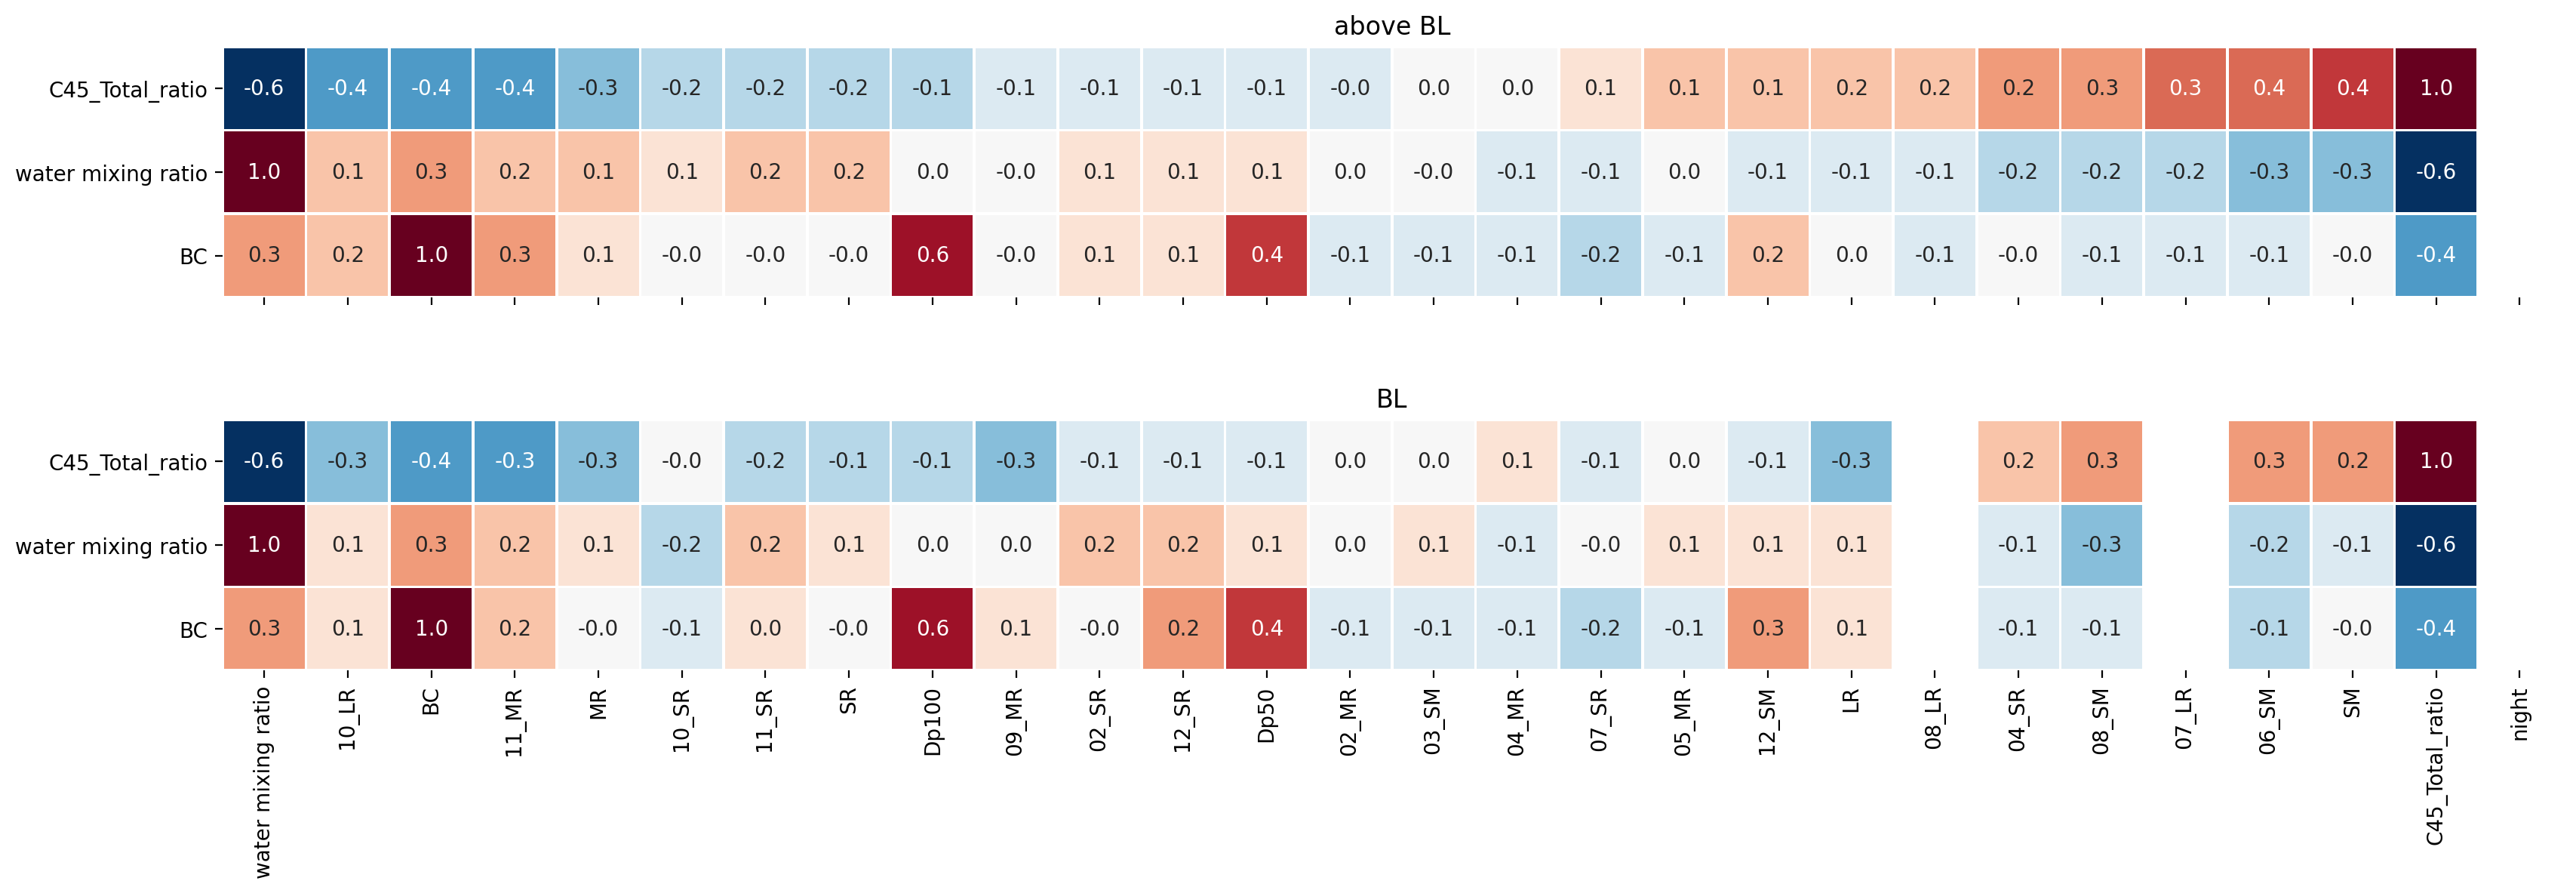

In [51]:
f,axs = plt.subplots(2,1,figsize=(20,6),dpi=200,sharex=True)
hm(dm[ccc],axs[0],'above BL')
hm(dm1[ccc],axs[1],'BL')

## create a proxi fro feer troposphere

In [52]:
dm = merge_df_ds(da2, ds_cl,lev='BL')
dm6 = merge_df_ds(da2, ds_cl,lev='BL',con='06')
nn = 6

In [53]:
d1 = dm.where(dm['night']==1)

In [54]:
d1['day'] = pd.to_datetime(d1.index.date) - pd.Timedelta(hours=12)

In [55]:
d2 = d1.groupby('day').mean()
d2.index += pd.Timedelta(hours=12)

In [56]:
leg = d2.iloc[:,:18].sum().sort_values(ascending=False).index

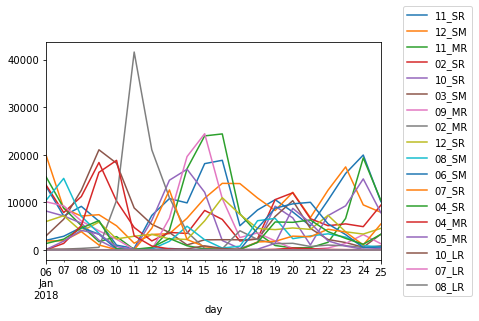

In [57]:
d2[leg].plot()
plt.legend(loc='center left',bbox_to_anchor=(1.05, 0.5))

In [58]:
aa=leg[leg.str.endswith('_SR')]

In [59]:
aa

Index(['11_SR', '02_SR', '10_SR', '12_SR', '07_SR', '04_SR'], dtype='object')

In [60]:
%matplotlib osx
f,ax=plt.subplots(figsize=(25,6))
(-dm[aa]).plot(ax=ax)
(-dm[aa]).sum(axis=1).plot(legend='SR')

axt = plt.gca().twinx()
dm['C45_Total_ratio'].plot(ax=axt,linestyle='-.',color='r')

axt = plt.gca().twinx()
dm['water mixing ratio'].plot(ax=axt,linestyle='--')
plt.legend(loc='center left',bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.gca().grid()

In [61]:
dm6.plot(ax=ax)

<AxesSubplot:xlabel='local time'>

In [62]:
dm

,08_LR,12_SR,10_SR,04_SR,03_SM,12_SM,07_SR,07_LR,05_MR,02_MR,...,11_SR,11_MR,08_SM,02_SR,C45_Total_ratio,water mixing ratio,BC,Dp50,Dp100,night
local time,,,,,,,,,,,,,,,,,,,,,
2018-01-06 12:30:00,0.0,8819.488198,5167.488315,1956.293248,1089.798808,9636.436712,1263.140184,0.0,51.009656,2.727144,...,9891.032111,3756.530557,14614.793535,14141.408372,0.595792,5.682307,169.606481,813.190620,819.476550,0
2018-01-06 13:30:00,0.0,6509.887646,4542.118600,1464.206091,1352.781025,10567.097011,1112.240936,0.0,33.725674,6.262833,...,9122.178124,4831.396692,12283.500577,14342.570541,0.592043,6.092728,178.444444,779.673750,848.450885,0
2018-01-06 14:30:00,0.0,5892.581280,4720.587552,957.988333,1884.524014,16971.632248,779.520613,0.0,33.799631,4.489335,...,10775.515956,8166.151074,9217.599554,20467.708711,0.570191,5.894021,171.402778,805.735685,868.566670,0
2018-01-06 15:30:00,0.0,4178.400084,4768.950795,1590.283870,1863.412798,12583.012424,1820.912431,0.0,29.555934,7.157058,...,8881.262633,6097.430481,10386.302598,17419.410374,0.617715,6.256450,190.212963,645.950095,836.028690,0
2018-01-06 16:30:00,0.0,4746.648523,5367.126489,1435.528706,2133.396911,14346.448963,2049.605074,0.0,37.112350,4.424693,...,11236.496780,7502.867939,9743.457401,17246.864563,0.560870,6.913516,170.255952,496.657235,729.438895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-25 19:30:00,0.0,5032.741463,1513.489844,2877.377968,7066.628948,10397.845191,287.714044,0.0,544.642473,484.038953,...,6666.316175,7815.006411,197.035384,16269.704810,0.326132,6.653780,765.833333,4582.944550,657.615875,1
2018-01-25 20:30:00,0.0,5535.501815,552.766101,1976.474765,8469.896838,12249.828743,145.606897,0.0,828.776894,658.076535,...,4262.833391,8586.390167,136.271786,11067.073386,0.187774,6.608329,586.444444,NaN,NaN,1
2018-01-25 21:30:00,0.0,6200.718411,448.266710,1184.523963,6289.582267,14612.152421,90.119242,0.0,515.398254,837.177243,...,3655.411884,8119.786370,63.561621,4571.648867,0.199132,6.293384,393.150794,NaN,NaN,1


## 5 FLAGS

- D05
- D15 
- D25 
- WMR
- C45 
- DIR6
- NIGHT
- RH

In [341]:
dm = merge_df_ds(da2, ds_cl,lev='BL')
dm6 = merge_df_ds(da2, ds_cl,lev='ALL',con='06')

# dm = dm[dm['night']==1]
# dm6 = dm6[dm6['night']==1]

<AxesSubplot:xlabel='local time'>

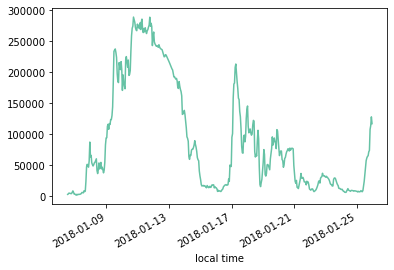

In [342]:
%matplotlib inline
dm6['03_PW'].plot()

In [343]:
SR_c = dm.iloc[:,:18].columns[dm.iloc[:,:18].columns.str.endswith('_SR')]
D05 = dm[SR_c].sum(axis=1)

SR_c = dm.iloc[:,:18].columns[dm.iloc[:,:18].columns.str.endswith('_SM')]
D15 = dm[SR_c].sum(axis=1) + D05

SR_c = dm.iloc[:,:18].columns[dm.iloc[:,:18].columns.str.endswith('_MR')]
D25 = dm[SR_c].sum(axis=1) + D15



<AxesSubplot:xlabel='local time'>

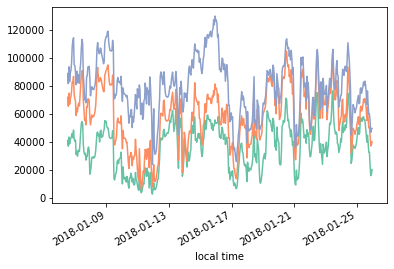

In [344]:
D05.plot()
D15.plot()
D25.plot()

In [345]:
dm.columns

Index(['08_LR', '12_SR', '10_SR', '04_SR', '03_SM', '12_SM', '07_SR', '07_LR',
       '05_MR', '02_MR', '09_MR', '10_LR', '04_MR', '06_SM', '11_SR', '11_MR',
       '08_SM', '02_SR', 'C45_Total_ratio', 'water mixing ratio', 'BC', 'Dp50',
       'Dp100', 'RH_station', 'CO_ppb', 'night'],
      dtype='object')

In [346]:
WMR = dm['water mixing ratio']
C45 = dm['C45_Total_ratio']
Dp50 = dm['Dp50']
Dp100 = dm['Dp100']
RH = dm['RH_station']
DIR6 = dm6.iloc[:,:6]
CO = dm['CO_ppb']
BC = dm['BC']


<AxesSubplot:xlabel='local time'>

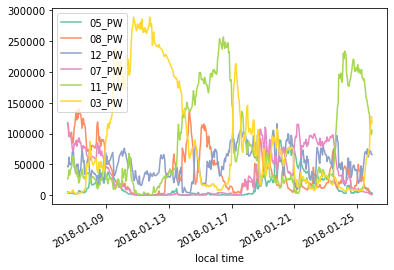

In [347]:
DIR6.plot()


<AxesSubplot:label='4af45483-2b31-4cc3-bfa5-a5c53ebd50dd', xlabel='local time'>

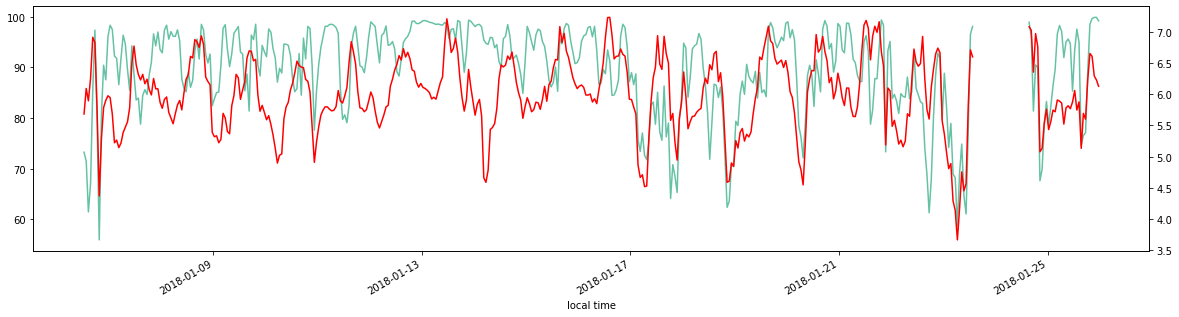

In [348]:
f,ax = plt.subplots(figsize=(20,5))
RH.plot()
axt = ax.twinx()
WMR.plot(ax=axt,c='r')

In [349]:
cdf = DIR6

In [350]:
cdf['D05'] = D05
cdf['D15'] = D15
cdf['D25'] = D25
cdf['L_Dp50'] = np.log(Dp50)
cdf['L_Dp100'] = np.log(Dp100)
cdf['RH'] = RH

In [351]:
cdf['WMR'] = WMR
cdf['C45'] = C45
cdf['L_BC'] = np.log(BC)
cdf['L_CO'] = np.log(CO )

In [352]:
cdf = cdf[cdf.columns[::-1]]

In [354]:
import sklearn.preprocessing

In [355]:
qt = sklearn.preprocessing.RobustScaler(quantile_range=(10.0, 90.0))

In [356]:
dm1 = cdf.dropna().copy()
dmm = dm1.copy()
dm1 = dm1 * 0 + qt.fit_transform(dm1)

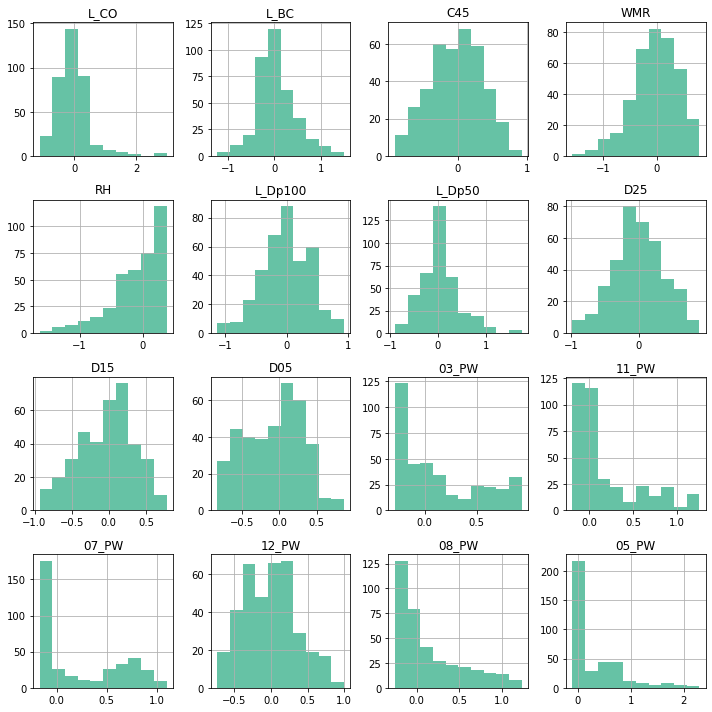

In [367]:
dm1.hist(figsize=(10, 10))
plt.gcf().tight_layout()

In [368]:
import sklearn.cluster

In [369]:
nc = 7
km = sklearn.cluster.KMeans(n_clusters=nc)

In [370]:
dm2 = dm1.copy()
dm2['C45'] *= 3
dm2['RH'] *= 2
dm2['D05'] *= 3
dm2['L_CO'] = 0
dm2['L_BC'] = 0 
# dm2['WMR'] *= 2
# dm2['night'] *= 5
km.fit(dm2)
# dm2['C45_Total_ratio'] /= 5
dm2['D05'] /= 3
dm2['C45'] /= 3
dm2['RH'] /= 2

In [371]:
valas = pd.DataFrame(km.cluster_centers_, columns=dm2.columns).sort_values(
    ['D05']).index

In [372]:
abc= 'abcdefghijklmnopqrstuv'
kk = {k: a for k, a in zip(valas, abc)};
rc = pd.Series(['D05','C45','WMR',*dm2.columns]).drop_duplicates()

In [373]:
dmm['k'] = [kk[x] for x in km.labels_]

In [374]:
sns.set_palette('Set2')

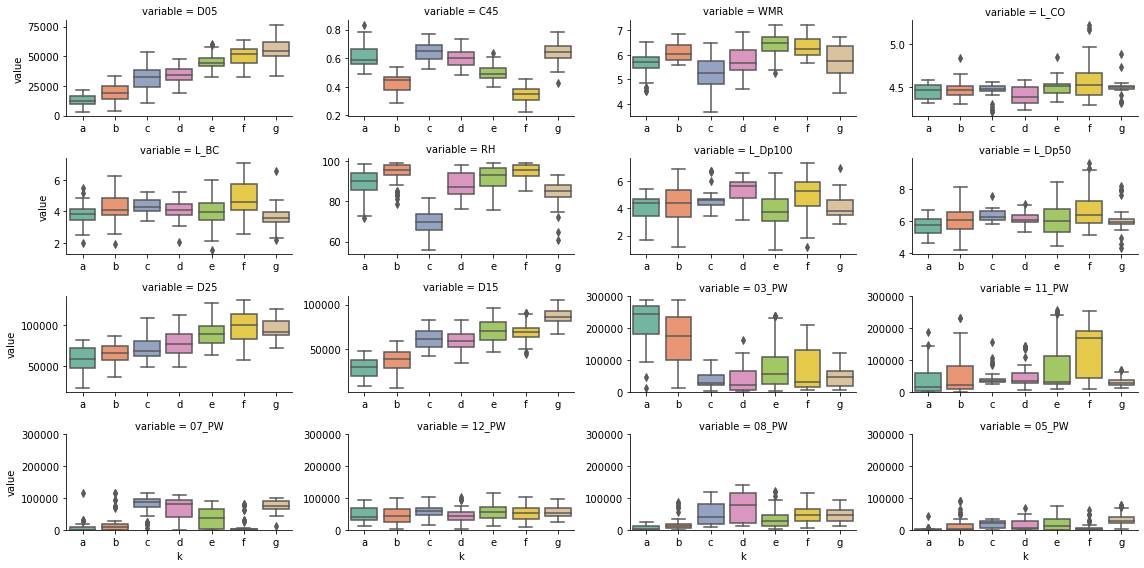

In [375]:
%matplotlib inline
g = sns.catplot(x='k', y='value', data=dmm.melt(id_vars='k'), orient="v",
                kind="box",
                col='variable', col_wrap=4, sharex=False, 
#                 palette='Set2',
                sharey=False, aspect=2, height=2,
                order='abcdefghijklmnopqrstuv'[:nc],
                col_order=rc
#                 alpha=.1,
                #                size=1

                )

# g.set_xticklabels(rotation=90)
# plt.gcf().set_dpi(50)
plt.gcf().tight_layout()

for a in g.axes[-6:]:
    a.set_ylim(0,300000)
    

<AxesSubplot:>

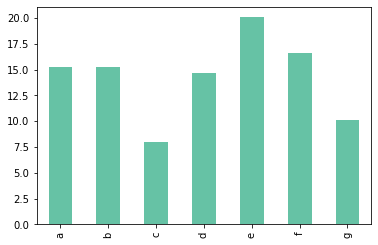

In [376]:
%matplotlib inline
(dmm['k'].value_counts()/dmm['k'].value_counts().sum()*100).sort_index().plot.bar()

In [377]:
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

Text(0, 0.5, 'n. cases (hours)')

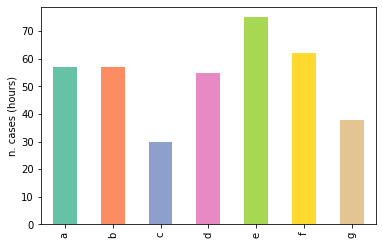

In [378]:
%matplotlib inline
(dmm['k'].value_counts()).sort_index().plot.bar(color = sns.color_palette())

plt.gca().set_ylabel('n. cases (hours)')

In [379]:
dmm2 = dmm.resample('H').first()

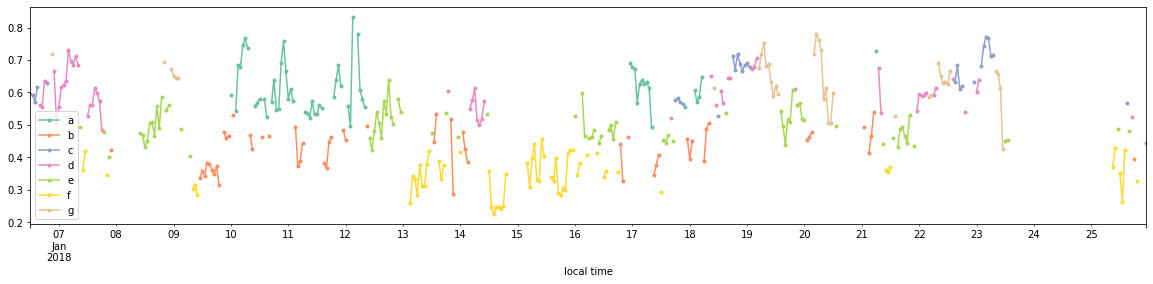

In [380]:
%matplotlib inline
f,ax = plt.subplots(figsize=(20,4))
for i in abc[:nc]:
    dmm2.where(dmm2['k']==i)['C45'].plot(label=i,marker='.')
#     dmm2.where(dmm2['k']==i)['C45'].plot(linewidth=0,,label=i)
    
plt.gca().legend()


In [381]:
dmm2.to_csv('cluster_george_c45.csv')